## Import dataset from Roboflow

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("srm-university-ap-oolrr").project("obstacle-detection-uqkm3")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Obstacle-Detection-2 in yolov8:: 100%|██████████| 15212/15212 [00:02<00:00, 6405.20it/s]


## Train YOLOV8n model

In [2]:
!pip -q install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [7]:
from ultralytics import YOLO

#load yolov8n model
model = YOLO("yolov8n.pt").to("cuda")

In [9]:
#Train the model
model.train(data="/content/Obstacle-Detection-2/data.yaml", epochs=50, batch=16, imgsz=640, device=0)

Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Obstacle-Detection-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 136MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 321MB/s]


AMP: checks passed ✅


train: Scanning /content/Obstacle-Detection-2/train/labels... 6145 images, 11 backgrounds, 0 corrupt: 100%|██████████| 6145/6145 [00:08<00:00, 728.42it/s]


train: New cache created: /content/Obstacle-Detection-2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 8, len(boxes) = 8030. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Obstacle-Detection-2/valid/labels... 1008 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1008/1008 [00:02<00:00, 471.52it/s]


val: New cache created: /content/Obstacle-Detection-2/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 1689. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.38G       1.04      2.749      1.444          2        640: 100%|██████████| 385/385 [02:09<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13<00:00,  2.42it/s]

                   all       1008       1689      0.597      0.657      0.697      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.26G      1.059      1.924      1.424          3        640: 100%|██████████| 385/385 [02:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.30it/s]


                   all       1008       1689      0.599      0.572      0.631      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.27G       1.07      1.753      1.432          3        640: 100%|██████████| 385/385 [02:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]


                   all       1008       1689      0.707      0.609      0.678      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.36G      1.061      1.611      1.424          5        640: 100%|██████████| 385/385 [02:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.54it/s]


                   all       1008       1689      0.765      0.672      0.765        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.24G      1.032       1.47      1.397          1        640: 100%|██████████| 385/385 [02:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.17it/s]

                   all       1008       1689      0.702      0.652      0.725      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.32G      1.012      1.363      1.389          3        640: 100%|██████████| 385/385 [01:56<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.72it/s]


                   all       1008       1689      0.705       0.75      0.794      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.38G     0.9895      1.287      1.381          1        640: 100%|██████████| 385/385 [02:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.20it/s]


                   all       1008       1689      0.732      0.778       0.82       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.26G     0.9555      1.184      1.347          4        640: 100%|██████████| 385/385 [02:05<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.95it/s]


                   all       1008       1689      0.716      0.719      0.791      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.35G     0.9552      1.142      1.346          2        640: 100%|██████████| 385/385 [02:05<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       1008       1689      0.766      0.669      0.768       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.27G     0.9367      1.092      1.331          4        640: 100%|██████████| 385/385 [02:05<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.82it/s]


                   all       1008       1689      0.763      0.739      0.824       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.28G     0.9313      1.059      1.324          3        640: 100%|██████████| 385/385 [02:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]

                   all       1008       1689      0.786       0.74      0.832      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.24G     0.9088     0.9979      1.301          4        640: 100%|██████████| 385/385 [02:05<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.53it/s]


                   all       1008       1689      0.795      0.707      0.807      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.35G     0.8963     0.9778      1.294          3        640: 100%|██████████| 385/385 [02:05<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.70it/s]

                   all       1008       1689      0.776      0.745      0.837      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.25G     0.8845     0.9476      1.283          4        640: 100%|██████████| 385/385 [02:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.87it/s]


                   all       1008       1689      0.774      0.775      0.841      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.26G     0.8861       0.94      1.287          8        640: 100%|██████████| 385/385 [02:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       1008       1689      0.793      0.776      0.834      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.26G       0.87     0.9122      1.279          3        640: 100%|██████████| 385/385 [02:09<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]

                   all       1008       1689      0.773      0.786      0.832      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.26G     0.8646     0.8884       1.27          5        640: 100%|██████████| 385/385 [02:10<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.68it/s]

                   all       1008       1689      0.802      0.788      0.854       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.27G     0.8509     0.8605      1.267          1        640: 100%|██████████| 385/385 [02:08<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.70it/s]


                   all       1008       1689       0.82       0.77      0.858      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.26G     0.8386     0.8424      1.249          5        640: 100%|██████████| 385/385 [02:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.72it/s]


                   all       1008       1689      0.837      0.771      0.843      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.35G     0.8251      0.827      1.243          2        640: 100%|██████████| 385/385 [02:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13<00:00,  2.42it/s]

                   all       1008       1689      0.798      0.792      0.816      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.35G     0.8254     0.8081       1.24          3        640: 100%|██████████| 385/385 [01:59<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.73it/s]


                   all       1008       1689      0.802      0.799      0.817      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.25G     0.8078     0.7865      1.236          1        640: 100%|██████████| 385/385 [02:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.75it/s]

                   all       1008       1689      0.846      0.764      0.861      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.26G     0.8155     0.7888      1.237          1        640: 100%|██████████| 385/385 [02:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.00it/s]

                   all       1008       1689      0.823      0.797      0.883      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.28G     0.8008     0.7709      1.226          6        640: 100%|██████████| 385/385 [02:07<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.30it/s]

                   all       1008       1689      0.802      0.802      0.865      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.24G     0.7775     0.7482      1.212          2        640: 100%|██████████| 385/385 [02:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.09it/s]

                   all       1008       1689       0.77      0.818      0.853      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.25G      0.776     0.7272      1.214          2        640: 100%|██████████| 385/385 [02:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13<00:00,  2.37it/s]

                   all       1008       1689      0.801      0.814      0.875      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.26G     0.7866     0.7355      1.212         10        640: 100%|██████████| 385/385 [01:59<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]

                   all       1008       1689      0.803        0.8      0.827      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.26G     0.7695     0.7088      1.208          4        640: 100%|██████████| 385/385 [02:08<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.59it/s]

                   all       1008       1689      0.834      0.792      0.875      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.28G     0.7576     0.6938      1.197          2        640: 100%|██████████| 385/385 [02:05<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]

                   all       1008       1689      0.815      0.811      0.883      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.23G     0.7483     0.6811      1.191          2        640: 100%|██████████| 385/385 [02:05<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.81it/s]


                   all       1008       1689      0.823      0.803      0.875      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.28G     0.7524     0.6725      1.186          4        640: 100%|██████████| 385/385 [02:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]

                   all       1008       1689      0.781      0.841      0.827      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.24G     0.7316     0.6707      1.178          2        640: 100%|██████████| 385/385 [01:58<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.75it/s]


                   all       1008       1689      0.796      0.823      0.885      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.26G     0.7248     0.6474      1.176          2        640: 100%|██████████| 385/385 [02:05<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.92it/s]

                   all       1008       1689      0.798      0.832      0.891      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.23G     0.7166      0.629      1.169          3        640: 100%|██████████| 385/385 [02:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.22it/s]

                   all       1008       1689      0.771      0.835      0.872      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.26G     0.7164     0.6269      1.167          5        640: 100%|██████████| 385/385 [02:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]

                   all       1008       1689      0.837      0.808      0.846      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.26G     0.7101     0.6166      1.163          4        640: 100%|██████████| 385/385 [02:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.92it/s]

                   all       1008       1689      0.788      0.834      0.884      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.26G     0.6927     0.6089      1.149          1        640: 100%|██████████| 385/385 [02:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]

                   all       1008       1689      0.856      0.811      0.839      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.25G     0.6971     0.6051      1.155          4        640: 100%|██████████| 385/385 [02:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.38it/s]

                   all       1008       1689      0.796      0.846      0.897      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.28G     0.6861     0.5863      1.145          0        640: 100%|██████████| 385/385 [02:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.29it/s]

                   all       1008       1689      0.849      0.824      0.902      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.28G     0.6845     0.5903      1.147          6        640: 100%|██████████| 385/385 [02:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.30it/s]

                   all       1008       1689      0.838      0.826       0.89      0.669


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.32G     0.5924      0.466      1.109          1        640: 100%|██████████| 385/385 [02:07<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.73it/s]


                   all       1008       1689      0.833       0.83      0.891      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.27G     0.5724     0.4336        1.1          7        640: 100%|██████████| 385/385 [02:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.18it/s]

                   all       1008       1689      0.816      0.839      0.903      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.24G     0.5516     0.4051      1.083          1        640: 100%|██████████| 385/385 [02:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]


                   all       1008       1689      0.822      0.839      0.893       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.26G     0.5548     0.4032      1.088          1        640: 100%|██████████| 385/385 [02:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.59it/s]

                   all       1008       1689       0.83      0.825      0.892      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.32G     0.5321     0.3867      1.066          1        640: 100%|██████████| 385/385 [02:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.34it/s]

                   all       1008       1689       0.83      0.829      0.856      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.25G     0.5239     0.3926      1.062         20        640: 100%|██████████| 385/385 [02:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.97it/s]


                   all       1008       1689      0.853      0.827      0.898      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.34G     0.5221     0.3787      1.063          1        640: 100%|██████████| 385/385 [01:55<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]


                   all       1008       1689      0.866      0.813      0.897      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.28G     0.5159     0.3622      1.047          1        640: 100%|██████████| 385/385 [01:55<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]

                   all       1008       1689      0.852      0.806      0.894      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.24G     0.5091     0.3671      1.048          5        640: 100%|██████████| 385/385 [01:58<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]

                   all       1008       1689      0.817      0.831      0.888       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.23G     0.4959     0.3565      1.042          1        640: 100%|██████████| 385/385 [01:57<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]

                   all       1008       1689      0.831      0.828      0.895       0.68



50 epochs completed in 1.873 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       1008       1689      0.831      0.828      0.894      0.681
                   bed         20         20      0.884        0.9      0.907      0.539
                  bike         93         93      0.999          1      0.995      0.952
                   bin         24         41      0.823       0.68      0.756      0.442
                   bus         59         59      0.887      0.966      0.978      0.914
                 chair        179        249       0.88      0.843      0.922      0.764
                  door         80         80      0.933      0.876      0.963      0.742
                person        366        940      0.814      0.471      0.616      0.368
                puddle         87         99      0.873      0.747      0.845      0.434
                 stair         29         29      0.991      0.793      0.982      0.644
                 table         69         78      0.854      0.833       0.88      0.697
                  tre

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  6,  8, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f905b3858d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

In [8]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")
print(model.device)

GPU Available: True
GPU Name: Tesla T4
cuda:0


## Validate the Trained Model

In [10]:
# Run validation
metrics = model.val()
print(metrics)  # Print validation results


Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Obstacle-Detection-2/valid/labels.cache... 1008 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1008/1008 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 1689. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:12<00:00,  4.91it/s]


                   all       1008       1689      0.831      0.828      0.895      0.681
                   bed         20         20      0.883        0.9      0.906      0.538
                  bike         93         93      0.999          1      0.995      0.953
                   bin         24         41      0.822      0.678      0.757      0.443
                   bus         59         59      0.887      0.966      0.978      0.914
                 chair        179        249      0.879      0.843      0.922      0.764
                  door         80         80      0.933      0.877      0.963      0.742
                person        366        940      0.816      0.471      0.616      0.369
                puddle         87         99      0.872      0.747      0.846      0.435
                 stair         29         29      0.992      0.793      0.982       0.64
                 table         69         78      0.854      0.833       0.88      0.694
                  tre

## Test the Model on Custom Images


image 1/1 /content/test.jpeg: 448x640 1 car, 46.8ms
Speed: 6.4ms preprocess, 46.8ms inference, 21.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


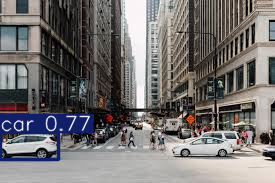

In [19]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Perform inference on a test image
results = model("/content/test.jpeg", save=True)  # Replace with your image path

# Display the image with detections
for result in results:
    img = result.plot()
    cv2_imshow(img)  # ✅ Use cv2_imshow() in Colab


## Generate `label_text.txt` File

In [20]:
import yaml

# Load class names from dataset YAML file
with open("/content/Obstacle-Detection-2/data.yaml", "r") as f:
    data_yaml = yaml.safe_load(f)

# Save class names to label_text.txt
with open("label_text.txt", "w") as f:
    for name in data_yaml["names"]:
        f.write(name + "\n")


## Export 8-bit Quantized TFLite Model


In [21]:
# Convert to 8-bit TFLite model
model.export(format="tflite", int8=True)

Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)
WARNING ⚠️ INT8 export requires a missing 'data' arg for calibration. Using default 'data=coco8.yaml'.

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 19, 8400) (6.0 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.26.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 267.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 324.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.6/445.6 kB 334.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

100%|██████████| 1.11M/1.11M [00:00<00:00, 140MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 36.12file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 1.8s, saved as '/content/runs/detect/train/weights/best.onnx' (11.8 MB)
TensorFlow SavedModel: collecting INT8 calibration images from 'data=coco8.yaml'

Dataset 'coco8.yaml' images not found ⚠️, missing path '/content/datasets/coco8/images/val'


100%|██████████| 433k/433k [00:00<00:00, 58.7MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 2775.11file/s]

Dataset download success ✅ (1.3s), saved to /content/datasets




Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 28630.06it/s]

New cache created: /content/datasets/coco8/labels/val.cache
TensorFlow SavedModel: WARNING ⚠️ >300 images recommended for INT8 calibration, found 4 images.


TensorFlow SavedModel: starting TFLite export with onnx2tf 1.26.3...
Saved artifact at '/content/runs/detect/train/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 640, 640, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 19, 8400), dtype=tf.float32, name=None)
Captures:
  140257767283152: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  140257767283536: TensorSpec(shape=(3, 3, 3, 16), dtype=tf.float32, name=None)
  140257767283920: TensorSpec(shape=(16,), dtype=tf.float32, name=None)
  140257767286032: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  140257767285072: TensorSpec(shape=(3, 3, 16, 32), dtype=tf.float32, name=None)
  140257767286992: TensorSpec(shape=(32,), dtype=tf.float32, name=None)
  140257767287184: TensorSpec(shape=(1, 1, 32, 32), dtype=tf.float32, name=None)
  140257767286416: TensorSpec(shape=(32,), dtype=tf.float32, name=None)
  140

'/content/runs/detect/train/weights/best_saved_model/best_int8.tflite'

In [22]:
!zip -r runs.zip runs

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/confusion_matrix_normalized.png (deflated 18%)
  adding: runs/detect/train/args.yaml (deflated 52%)
  adding: runs/detect/train/val_batch2_pred.jpg (deflated 12%)
  adding: runs/detect/train/PR_curve.png (deflated 9%)
  adding: runs/detect/train/val_batch0_labels.jpg (deflated 10%)
  adding: runs/detect/train/results.png (deflated 7%)
  adding: runs/detect/train/train_batch0.jpg (deflated 2%)
  adding: runs/detect/train/val_batch1_pred.jpg (deflated 22%)
  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/last.pt (deflated 9%)
  adding: runs/detect/train/weights/best.pt (deflated 9%)
  adding: runs/detect/train/weights/best_saved_model/ (stored 0%)
  adding: runs/detect/train/weights/best_saved_model/assets/ (stored 0%)
  adding: runs/detect/train/weights/best_saved_model/best_float32.tflite (deflated 14%)
  adding: runs/de